# 模块导入

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 


In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
# 显示所有行
pd.set_option("display.max_rows", None)
# 显示所有列
pd.set_option("display.max_columns", None)
# 保留小数点后几位
pd.set_option('precision', 0)
#取消科学计数法
pd.set_option("display.float_format", lambda x: "%.1f" % x)



# 公用方法

## 画图公用方法

In [4]:
def data_plt(index_ls,
             violin_list,
             boxplot_list,
             violin_color={'color': '#FFF', 'facecolor': '#FFC700'},
             box_color={'color': '#FFC700', 'facecolor': '#FFC700'},
             violin_alpha=0.4):
    # 画布大小
    plt.figure(figsize=(15, 7))

    # 解决中文乱码
    plt.rcParams['font.sans-serif'] = ['SimHei']

    # 用来正常显示负号
    plt.rcParams['axes.unicode_minus'] = False

    # 图标标签
    # plt.title('彭水英语学科两个班级箱线图+小提琴图',fontsize=20)

    # XY轴标签
    plt.xlabel('学期学科')
    plt.ylabel('分数')

    # 刻度字体大小
    plt.tick_params(labelsize=14)

    # Y轴最大值和最小值
    plt.ylim(ymin=0, ymax=101)

    # 绘制小提琴图
    for i in violin_list:
        violin = plt.violinplot(
            # dataset：数据集，如果有多个数据集，应该转换为list形式
            dataset=i,
            # vert：是否要垂直放置
            vert=True,
            # widths：图形最大宽度
            widths=0.6,
            # showmeans：是否显示均值点
            showmeans=False,
            # showextrema：是否显示数据极限值
            showextrema=False,
            # quantiles：列表类型，列表元素在0到1之间，表示显示这些n分点
            quantiles=None)

        # 设置 小提琴图的颜色，set_facecolor填充颜色，set_edgecolor边框颜色
        for patch in violin['bodies']:
            patch.set_facecolor(violin_color['facecolor'])
            patch.set_edgecolor(violin_color['color'])
            patch.set_alpha(violin_alpha)

    # 绘制箱线图
    bplot = plt.boxplot(
        # x 指定要绘制箱线图的数据
        x=boxplot_list,
        # 是否需要将箱线图垂直摆放
        vert=None,
        # 设置中位线处凹陷
        notch=False,
        # 为箱线图添加标签
        labels=index_ls,
        # patch_artist 是否填充箱体的颜色；
        patch_artist=True,
        # showmeans是否显示均值
        showmeans=True,
        # meanline是否用线的形式表示均值
        meanline=False,
        # widths指定箱线图的宽度
        widths=0.3,
        # showcaps是否显示箱线图顶端和末端的两条线
        showcaps=True,
        # boxprops：color箱体边框色，facecolor箱体填充色；
        boxprops=box_color,
        # 须的颜色
        whiskerprops={'color': '#B8B8B8'},
        # 顶端末端线
        capprops={'color': '#B8B8B8'},
        # 中位线颜色
        medianprops={'color': 'red'},
        # 设置均值
        meanprops={"marker": "D",
                   "markerfacecolor": "white", "color": "white"},
        # 设置异常值属性，点的形状、填充色和边框色
        flierprops={"marker": "o", "markerfacecolor": "#FF8A70",
                    "markeredgecolor": "white"},


    )

    return violin, bplot

## 读文件公用方法

In [5]:
# 文件读取公用方法

def read_file(file_path,sheet_name,index_col=0):
    
    # 
    data = pd.DataFrame(pd.read_excel(file_path,sheet_name=sheet_name,index_col=0))
    
    #行列翻转
    data_reversal = pd.DataFrame(data.values.T, index=data.columns, columns=data.index)

    
    return data ,data_reversal


# 测试数据

## 测试

In [6]:
data_test = pd.DataFrame(pd.read_excel('C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls',sheet_name='英语'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls'

In [ ]:
data_test = pd.DataFrame(pd.read_excel('C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls',sheet_name='英语'))


# boxplot 数据

# 第一列数据删除nan值 
column_data_1 = data_test.iloc[:,1:2].dropna(axis=0,how = 'any')


# 第二列数据删除nan值
column_data_2 = data_test.iloc[:,2:3].dropna(axis=0,how = 'any')

# 取列名称专程列表
data_test.columns[1:9].tolist()


# voilin 数据
test_data = [0]
column_data_1_test = pd.DataFrame(test_data)
column_data_2_test = pd.DataFrame(test_data)

data_1 = pd.concat([column_data_1,column_data_1_test],axis=1).fillna(0)

data_2 = pd.concat([column_data_2_test,column_data_2],axis=1).fillna(0)

index_ls = ['语文9月','语文10月']


## 演示

In [7]:
# 准备数据
# violin图数据准备 ，data_reversal
yw9_data, yw9_data_reversal = read_file(
    file_path='C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls', sheet_name='语文9')
yw10_data, yw10_data_reversal = read_file(
    file_path='C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls', sheet_name='语文10')


#  boxplot 数据准备
yw9_data = yw9_data['语文9月']
yw10_data = yw10_data['语文10月']


index_ls = yw9_data_reversal.index.to_list()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls'

In [8]:
#调 生成图方法

data_plt(index_ls=index_ls,
         violin_list=[yw9_data_reversal, yw10_data_reversal],
         boxplot_list=[yw9_data, yw10_data],
        )
print()

NameError: name 'index_ls' is not defined

## 区域线成绩分析

In [17]:
excel_data1,excel_data2 = read_file(file_path = 'C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-【2018-2019学年第一学期初一年级期中考试】.xls',sheet_name='Sheet1')
excel_data1

,准考证号,班级,语文,数学,英语,生物,政治,历史,地理,总分
学籍号,,,,,,,,,,
1811028,86489468,七年级10班(东校区),89.5,95,92.5,91,83.0,93,88,632.0
1811038,86532082,七年级10班(东校区),83.0,89,83.0,94,88.0,94,82,613.0
1811032,88300255,七年级10班(东校区),81.5,95,90.5,98,84.0,79,85,613.0
1811027,86532538,七年级10班(东校区),83.0,88,96.5,93,83.0,86,77,606.5
1811018,86489450,七年级10班(东校区),74.0,96,75.5,94,80.0,94,83,596.5
1811011,86469207,七年级10班(东校区),79.5,95,79.5,87,80.0,96,75,592.0
1811003,88300082,七年级10班(东校区),76.0,92,90.0,76,88.0,93,77,592.0
1811020,86469570,七年级10班(东校区),83.5,82,94.0,81,79.0,96,74,589.5
1811036,86469010,七年级10班(东校区),87.0,87,85.0,93,80.0,90,65,587.0


In [18]:
#总分分数线
total_score1 = 600
#语文分数线
yw_score1 = 90
#数学分数线
ss_score1 = 95


#总分分数线
total_score2 = 500
#语文分数线
yw_score2 = 80
#数学分数线
ss_score2 = 85

In [19]:
total_score1_data = (excel_data1.iloc[:,][excel_data1['总分'] >= total_score1]).groupby(by = ['班级']).agg('count')['准考证号']
yw_score1_data = (excel_data1.iloc[:,][excel_data1['语文'] >= yw_score1]).groupby(by = ['班级']).agg('count')['准考证号']
ss_score1_data = (excel_data1.iloc[:,][excel_data1['数学'] >= ss_score1]).groupby(by = ['班级']).agg('count')['准考证号']


In [20]:
excel_data1.columns.to_list()[2:]

['语文', '数学', '英语', '生物', '政治', '历史', '地理', '总分']

In [21]:
concat_score1 = pd.concat([total_score1_data,yw_score1_data,ss_score1_data],axis=1).fillna(0)
concat_score1.columns = ['总分','语文','数学']
score20 = pd.DataFrame({

    '总分':['{}分'.format(total_score1),total_score1_data.agg('sum')],
    '语文':['{}分'.format(yw_score1),yw_score1_data.agg('sum')],
    '数学':['{}分'.format(ss_score1),ss_score1_data.agg('sum')],

},index=['区域线(20%)','本校'])

concat_score1 = pd.concat([score20,concat_score1],axis=0)
concat_score1.loc['七年级10班(东校区)':'七年级南校6班(南校区)'] = (concat_score1.loc['七年级10班(东校区)':'七年级南校6班(南校区)']).astype(int)
concat_score1

,总分,语文,数学
区域线(20%),600分,90分,95分
本校,208,22,123
七年级10班(东校区),4,0,4
七年级1班(东校区),31,7,18
七年级2班(东校区),34,5,17
七年级3班(东校区),28,4,17
七年级4班(东校区),17,1,15
七年级5班(东校区),3,0,0
七年级6班(东校区),1,0,0
七年级7班(东校区),3,0,2


In [22]:
total_score2_data = excel_data1.iloc[:,][(excel_data1['总分'] >= total_score2) & (excel_data1['总分'] < total_score1) ].groupby(by = ['班级']).agg('count')['准考证号']
yw_score2_data = excel_data1.iloc[:,][(excel_data1['语文'] >= yw_score2) & (excel_data1['语文'] < yw_score1) ].groupby(by = ['班级']).agg('count')['准考证号']
ss_score2_data = excel_data1.iloc[:,][(excel_data1['数学'] >= ss_score2) & (excel_data1['数学'] < ss_score1) ].groupby(by = ['班级']).agg('count')['准考证号']




In [23]:
concat_score2 = pd.concat([total_score2_data,yw_score2_data,ss_score2_data],axis=1).fillna(0)
concat_score2.columns = ['总分','语文','数学']
score20_40 = pd.DataFrame({

    '总分':['{}分~{}分'.format(total_score2,total_score1) ,total_score2_data.agg('sum')] ,
    '语文':['{}分~{}分'.format(yw_score2,yw_score1) ,yw_score2_data.agg('sum')],
    '数学':['{}分~{}分'.format(ss_score2,ss_score1) ,ss_score2_data.agg('sum')],
    
    
},index=['区域线(20%~40%)','本校'])

concat_score2 = pd.concat([score20_40,concat_score2],axis=0)

concat_score2

,总分,语文,数学
区域线(20%~40%),500分~600分,80分~90分,85分~95分
本校,332,223,324
七年级10班(东校区),24,10,17
七年级1班(东校区),13,25,23
七年级2班(东校区),9,25,23
七年级3班(东校区),16,24,26
七年级4班(东校区),25,26,24
七年级5班(东校区),20,4,22
七年级6班(东校区),24,3,18
七年级7班(东校区),24,4,18


In [24]:
concat_score_z = pd.concat([concat_score1, concat_score2], axis=0)
concat_score_z

,总分,语文,数学
区域线(20%),600分,90分,95分
本校,208,22,123
七年级10班(东校区),4,0,4
七年级1班(东校区),31,7,18
七年级2班(东校区),34,5,17
七年级3班(东校区),28,4,17
七年级4班(东校区),17,1,15
七年级5班(东校区),3,0,0
七年级6班(东校区),1,0,0
七年级7班(东校区),3,0,2


In [25]:
concat_score_z.to_excel('C:\\Users\\caozhiqiang\\Desktop\\数据分析\\test.xls')

# 理工附中期中数据

In [26]:
file_path = 'C:\\Users\\caozhiqiang\\Desktop\\理工附中数据分析\\数据整理\\初三所有学科(初三_z020_理工附中) - 小提琴.xlsx'

yw_violin_color = {  'color': '#FFF','facecolor': '#FFC700'}
yw_box_color = { 'color': '#FFC700','facecolor': '#FFC700'}

sx_violin_color = {  'color': '#FFF','facecolor': '#7DDC18'}
sx_box_color = { 'color': '#7DDC18','facecolor': '#7DDC18'}

yy_violin_color = {  'color': '#FFF','facecolor': '#29BCFF'}
yy_box_color = { 'color': '#29BCFF','facecolor': '#29BCFF'}

ls_violin_color = {  'color': '#FFF','facecolor': '#9192FF'}
ls_box_color = { 'color': '#9192FF','facecolor': '#9192FF'}

df_violin_color = {  'color': '#FFF','facecolor': '#FF9BAF'}
df_box_color = { 'color': '#FF9BAF','facecolor': '#FF9BAF'}

hx_violin_color = {  'color': '#FFF','facecolor': '#FFA268'}
hx_box_color = { 'color': '#FFA268','facecolor': '#FFA268'}

wl_violin_color = {  'color': '#FFF','facecolor': '#FFB123'}
wl_box_color = { 'color': '#FFB123','facecolor': '#FFB123'}

sw_violin_color = {  'color': '#FFF','facecolor': '#6FA2FE'}
sw_box_color = { 'color': '#6FA2FE','facecolor': '#6FA2FE'}

zz_violin_color = {  'color': '#FFF','facecolor': '#4DD982'}
zz_box_color = { 'color': '#4DD982','facecolor': '#4DD982'}

dl_violin_color = {  'color': '#FFF','facecolor': '#3AD9FF'}
dl_box_color = { 'color': '#3AD9FF','facecolor': '#3AD9FF'}



## 语文

C:\Users\caozhiqiang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


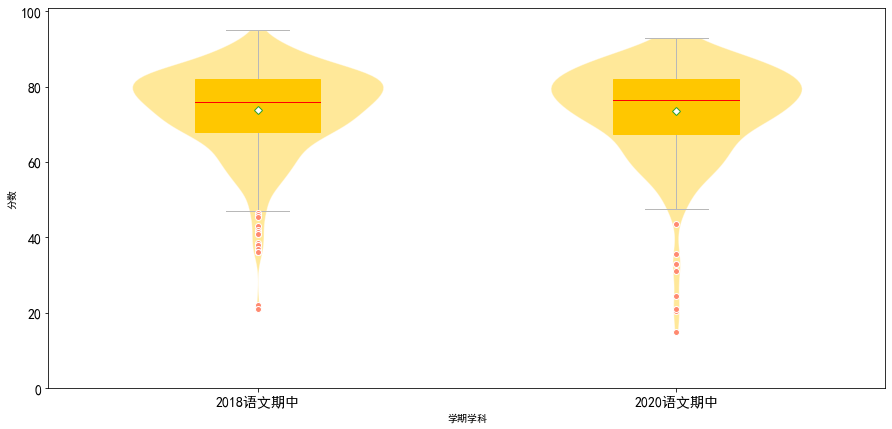

In [27]:


# 读取文件，， data_reversal 是  viloin图数据
yw2018_data, yw2018_data_violin = read_file(file_path=file_path,
                                            sheet_name='语文2018')
yw2020_data, yw2020_data_violin = read_file(file_path=file_path,
                                            sheet_name='语文2020')

# 索引
yw_index = yw2018_data_violin.index.to_list()


# 准备  boxplot 数据
yw2018_data = yw2018_data.iloc[:,0]
yw2020_data = yw2020_data.iloc[:,1]



# 调 生成图方法

data_plt(index_ls = yw_index,
         violin_list = [yw2018_data_violin, yw2020_data_violin],
         boxplot_list = [yw2018_data, yw2020_data],
         violin_color = yw_violin_color,
         box_color = yw_box_color,
        )
print()

## 数学

C:\Users\caozhiqiang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


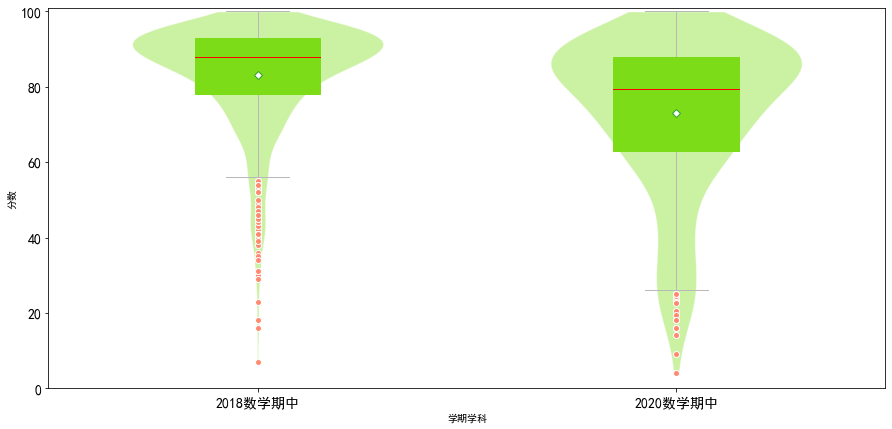

In [28]:
# 读取文件，， data_reversal 是  viloin图数据
sx2018_data, sx2018_data_violin = read_file(file_path=file_path,
                                            sheet_name='数学2018')
sx2020_data, sx2020_data_violin = read_file(file_path=file_path,
                                            sheet_name='数学2020')

# 准备  boxplot 数据
sx2018_data = sx2018_data.iloc[:, 0]
sx2020_data = sx2020_data.iloc[:, 1]

# 索引
sx_index = sx2018_data_violin.index.to_list()


# 调 生成图方法
data_plt(index_ls=sx_index,
         violin_list=[sx2018_data_violin, sx2020_data_violin],
         boxplot_list=[sx2018_data, sx2020_data],
         violin_color=sx_violin_color,
         box_color=sx_box_color,
         )
print()

## 英语

C:\Users\caozhiqiang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


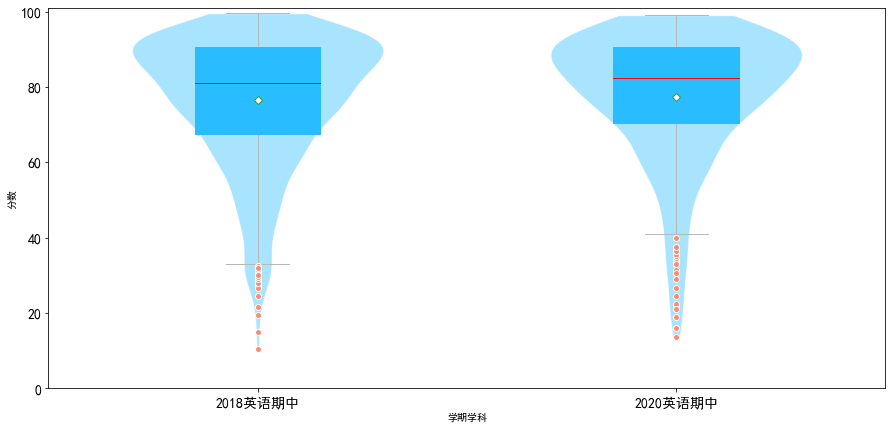

In [29]:
# 读取文件，， data_reversal 是  viloin图数据
yy2018_data, yy2018_data_violin = read_file(file_path=file_path,
                                            sheet_name='英语2018')
yy2020_data, yy2020_data_violin = read_file(file_path=file_path,
                                            sheet_name='英语2020')

# 准备  boxplot 数据
yy2018_data = yy2018_data.iloc[:, 0]
yy2020_data = yy2020_data.iloc[:, 1]

# 索引
yy_index = yy2018_data_violin.index.to_list()


# 调 生成图方法
data_plt(index_ls=yy_index,
         violin_list=[yy2018_data_violin, yy2020_data_violin],
         boxplot_list=[yy2018_data, yy2020_data],
         violin_color=yy_violin_color,
         box_color=yy_box_color,)
print()

## 历史

C:\Users\caozhiqiang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


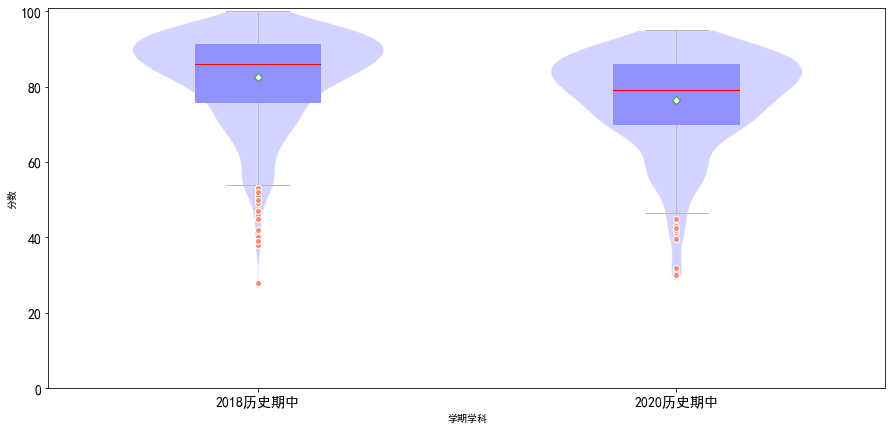

In [30]:
# 读取文件，， data_reversal 是  viloin图数据
ls2018_data, ls2018_data_violin = read_file(file_path=file_path,
                                            sheet_name='历史2018')
ls2020_data, ls2020_data_violin = read_file(file_path=file_path,
                                            sheet_name='历史2020')

# 准备  boxplot 数据
ls2018_data = ls2018_data.iloc[:, 0]
ls2020_data = ls2020_data.iloc[:, 1]

# 索引
ls_index = ls2018_data_violin.index.to_list()

# 调 生成图方法
data_plt(
    index_ls=ls_index,
    violin_list=[ls2018_data_violin, ls2020_data_violin],
    boxplot_list=[ls2018_data, ls2020_data],
    violin_color=ls_violin_color,
    box_color=ls_box_color,
)
print()

## 道法综合2020

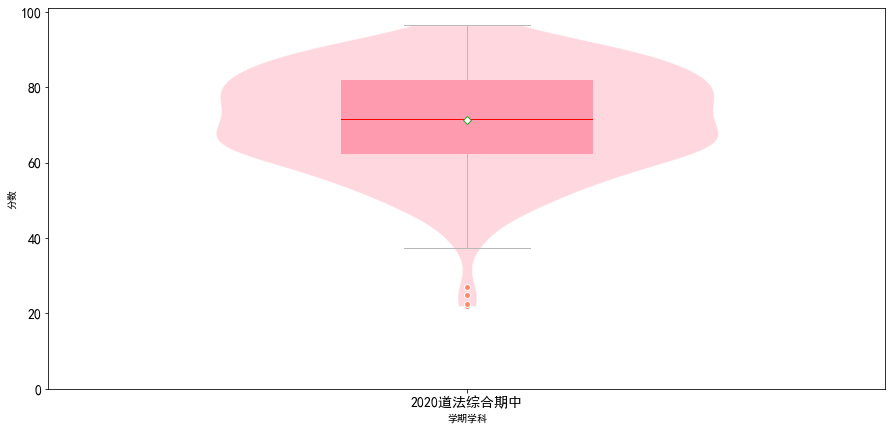

In [31]:
# 读取文件，， data_reversal 是  viloin图数据

df2020_data, df2020_data_violin = read_file(file_path=file_path,
                                            sheet_name='道法综合2020')

# 准备  boxplot 数据
df2020_data = df2020_data.iloc[:, 0]

# 索引
df_index = df2020_data_violin.index.to_list()


# 调 生成图方法
data_plt(index_ls=df_index,
         violin_list=[df2020_data_violin],
         boxplot_list=[df2020_data],
         violin_color=df_violin_color,
         box_color=df_box_color,
         )
print()

## 化学2020

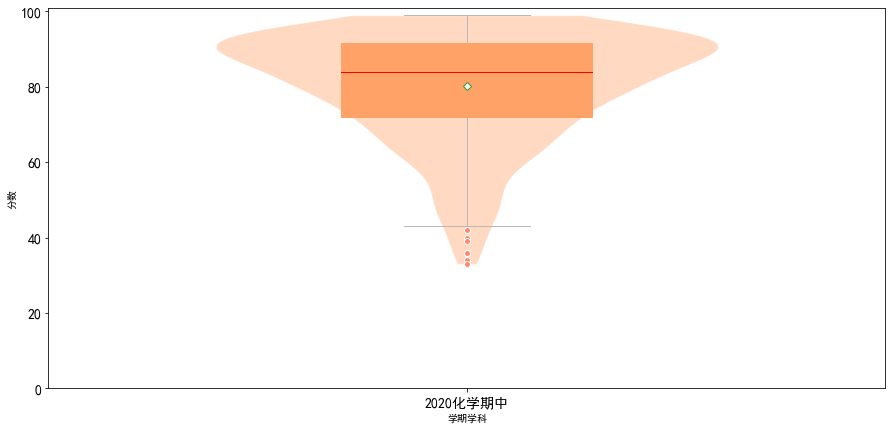

In [35]:
# 读取文件，， data_reversal 是  viloin图数据

hx2020_data, hx2020_data_violin = read_file(file_path=file_path,
                                            sheet_name='化学2020')

# 准备  boxplot 数据
hx2020_data = hx2020_data.iloc[:, 0]

# 索引
hx_index = hx2020_data_violin.index.to_list()

# 调 生成图方法
data_plt(
    index_ls=hx_index,
    violin_list=[hx2020_data_violin],
    boxplot_list=[hx2020_data],
    violin_color=hx_violin_color,
    box_color=hx_box_color,
)
print()

## 物理2020

C:\Users\caozhiqiang\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


ValueError: Dimensions of labels and X must be compatible

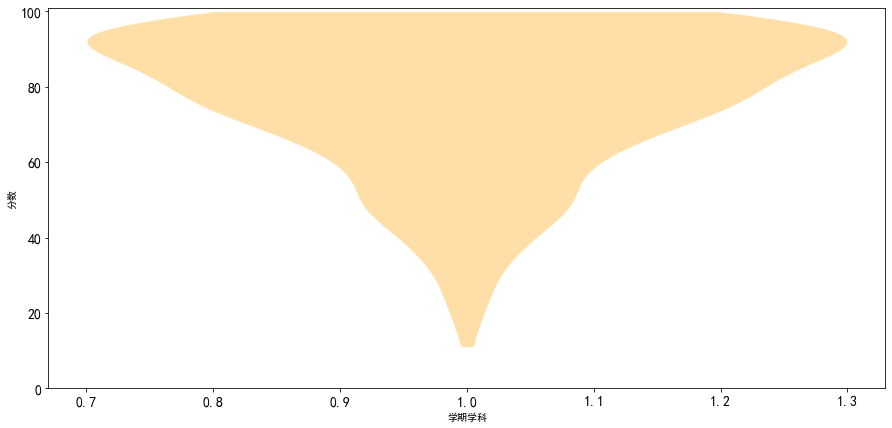

In [36]:
# 读取文件，， data_reversal 是  viloin图数据

wl2020_data, wl2020_data_violin = read_file(file_path=file_path,
                                            sheet_name='物理2020')

# 准备  boxplot 数据
wl2020_data = wl2020_data.iloc[:, 0]

# 索引
wl_index = wl2020_data_violin.index.to_list()


# 调 生成图方法
data_plt(index_ls=wl_index,
         violin_list=[wl2020_data_violin],
         boxplot_list=[wl2020_data],
         violin_color=wl_violin_color,
         box_color=wl_box_color,)
print()

## 生物2018

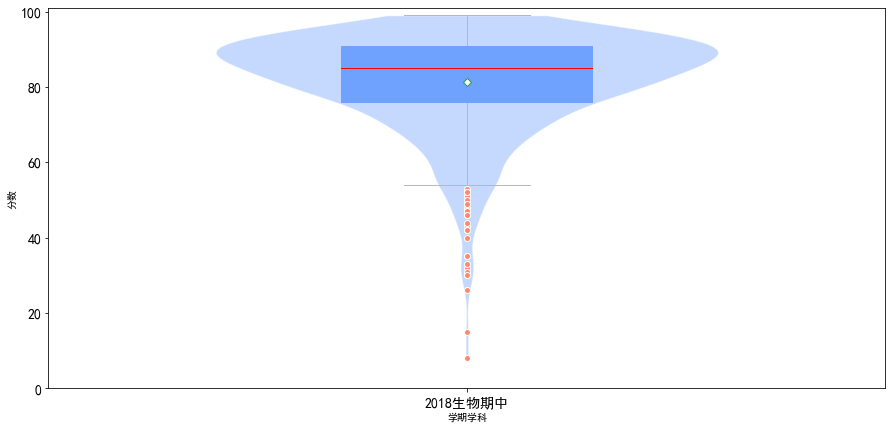

In [37]:
# 读取文件，， data_reversal 是  viloin图数据

sw2018_data, sw2018_data_violin = read_file(file_path=file_path,
                                            sheet_name='生物2018')

# 准备  boxplot 数据
sw2018_data = sw2018_data.iloc[:, 0]

# 索引
sw_index = sw2018_data_violin.index.to_list()


# 调 生成图方法
data_plt(index_ls=sw_index,
         violin_list=[sw2018_data_violin],
         boxplot_list=[sw2018_data],
         violin_color=sw_violin_color,
         box_color=sw_box_color,)
print()

## 政治2018

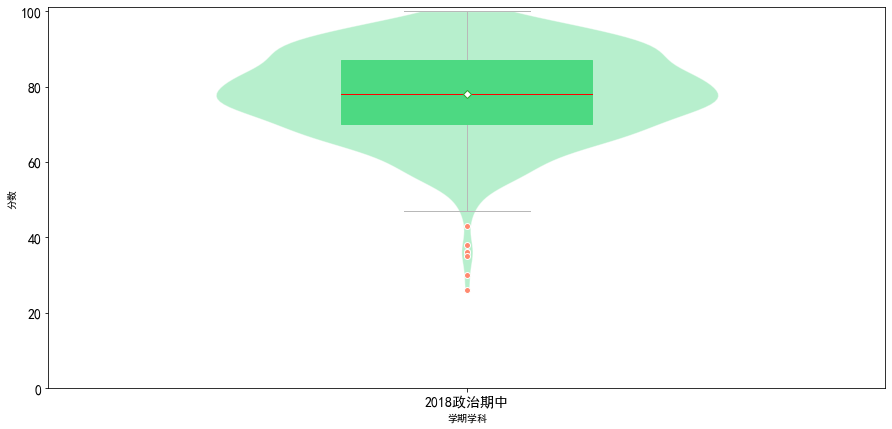

In [38]:
# 读取文件，， data_reversal 是  viloin图数据

zz2018_data, zz2018_data_violin = read_file(file_path=file_path,
                                            sheet_name='政治2018')

# 准备  boxplot 数据
zz2018_data = zz2018_data.iloc[:, 0]

# 索引
zz_index = zz2018_data_violin.index.to_list()


# 调 生成图方法
data_plt(index_ls=zz_index,
         violin_list=[zz2018_data_violin],
         boxplot_list=[zz2018_data],
         violin_color=zz_violin_color,
         box_color=zz_box_color,
         )
print()

## 地理2018

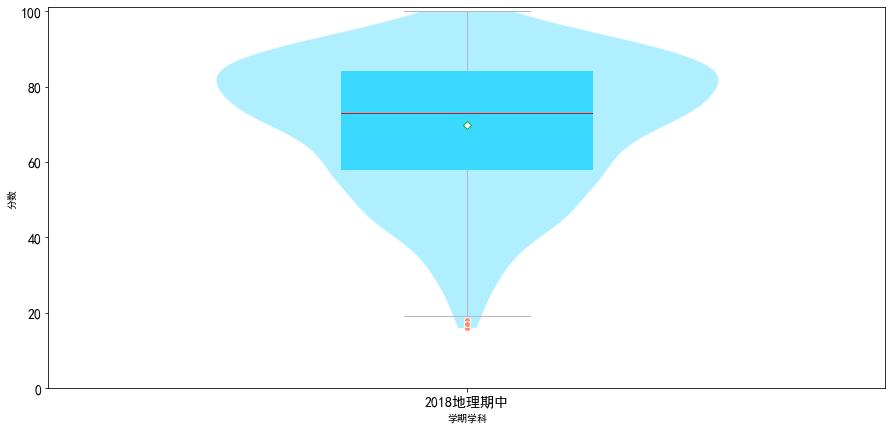

In [39]:
# 读取文件，， data_reversal 是  viloin图数据

dl2018_data, dl2018_data_violin = read_file(file_path=file_path,
                                            sheet_name='地理2018')

# 准备  boxplot 数据
dl2018_data = dl2018_data.iloc[:, 0]

# 索引
dl_index = dl2018_data_violin.index.to_list()


# 调 生成图方法
data_plt(index_ls=dl_index,
         violin_list=[dl2018_data_violin],
         boxplot_list=[dl2018_data],
         violin_color=dl_violin_color,
         box_color=dl_box_color,)
print()

## 2020所有学科

In [40]:
# 读取文件，， data_reversal 是  viloin图数据


subject2020_yw_data, subject2020_yw_data_violin = read_file(file_path=file_path,
                                            sheet_name='2020期中语文')
subject2020_sx_data, subject2020_sx_data_violin = read_file(file_path=file_path,
                                            sheet_name='2020期中数学')
subject2020_yy_data, subject2020_yy_data_violin = read_file(file_path=file_path,
                                            sheet_name='2020期中英语')
subject2020_ls_data, subject2020_ls_data_violin = read_file(file_path=file_path,
                                            sheet_name='2020期中历史')
subject2020_df_data, subject2020_df_data_violin = read_file(file_path=file_path,
                                            sheet_name='2020期中道法')
subject2020_hx_data, subject2020_hx_data_violin = read_file(file_path=file_path,
                                            sheet_name='2020期中化学')
subject2020_wl_data, subject2020_wl_data_violin = read_file(file_path=file_path,
                                            sheet_name='2020期中物理')



C:\Users\caozhiqiang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


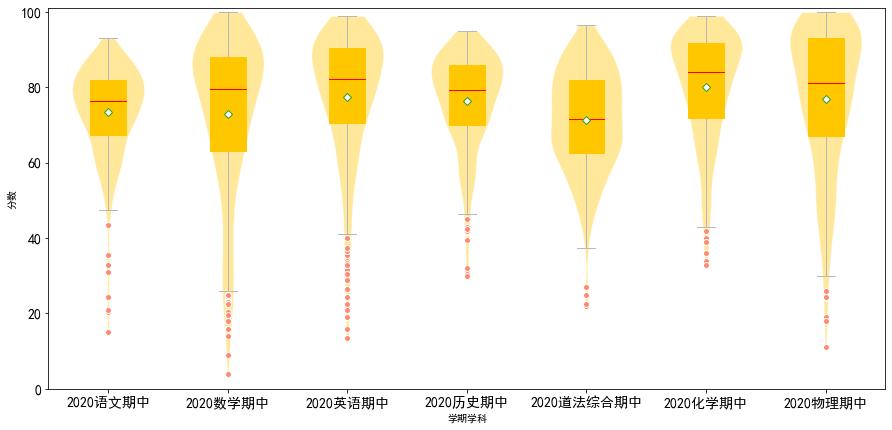

In [41]:
# 索引
subject_index = subject2020_yw_data_violin.index.to_list()

# 准备  boxplot 数据
subject2020_yw_data = subject2020_yw_data.iloc[:, 0]
subject2020_sx_data = subject2020_sx_data.iloc[:, 1]
subject2020_yy_data = subject2020_yy_data.iloc[:, 2]
subject2020_ls_data = subject2020_ls_data.iloc[:, 3]
subject2020_df_data = subject2020_df_data.iloc[:, 4]
subject2020_hx_data = subject2020_hx_data.iloc[:, 5]
subject2020_wl_data = subject2020_wl_data.iloc[:, 6]

# 调 生成图方法

data_plt(index_ls=subject_index,
         violin_list=[
             subject2020_yw_data_violin, subject2020_sx_data_violin,
             subject2020_yy_data_violin, subject2020_ls_data_violin,
             subject2020_df_data_violin, subject2020_hx_data_violin,
             subject2020_wl_data_violin
         ],
         boxplot_list=[
             subject2020_yw_data, subject2020_sx_data, subject2020_yy_data,
             subject2020_ls_data, subject2020_df_data, subject2020_hx_data,
             subject2020_wl_data
         ])
print()

## 2018所有学科

In [42]:
# 读取文件，， data_reversal 是  viloin图数据

subject2018_yw_data, subject2018_yw_data_violin = read_file(file_path=file_path,
                                            sheet_name='2018期中语文')
subject2018_sx_data, subject2018_sx_data_violin = read_file(file_path=file_path,
                                            sheet_name='2018期中数学')
subject2018_yy_data, subject2018_yy_data_violin = read_file(file_path=file_path,
                                            sheet_name='2018期中英语')
subject2018_ls_data, subject2018_ls_data_violin = read_file(file_path=file_path,
                                            sheet_name='2018期中历史')
subject2018_df_data, subject2018_df_data_violin = read_file(file_path=file_path,
                                            sheet_name='2018期中生物')
subject2018_hx_data, subject2018_hx_data_violin = read_file(file_path=file_path,
                                            sheet_name='2018期中政治')
subject2018_wl_data, subject2018_wl_data_violin = read_file(file_path=file_path,
                                            sheet_name='2018期中地理')



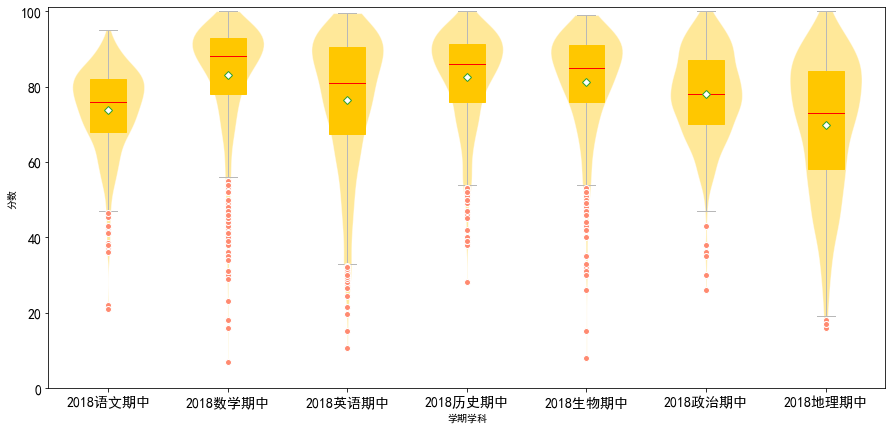

In [43]:
# 索引
subject_index = subject2018_yw_data_violin.index.to_list()


# 准备  boxplot 数据
subject2018_yw_data = subject2018_yw_data.iloc[:, 0]
subject2018_sx_data = subject2018_sx_data.iloc[:, 1]
subject2018_yy_data = subject2018_yy_data.iloc[:, 2]
subject2018_ls_data = subject2018_ls_data.iloc[:, 3]
subject2018_df_data = subject2018_df_data.iloc[:, 4]
subject2018_hx_data = subject2018_hx_data.iloc[:, 5]
subject2018_wl_data = subject2018_wl_data.iloc[:, 6]

# 调 生成图方法

data_plt(index_ls=subject_index,
         violin_list=[
             subject2018_yw_data_violin, subject2018_sx_data_violin,
             subject2018_yy_data_violin, subject2018_ls_data_violin,
             subject2018_df_data_violin, subject2018_hx_data_violin,
             subject2018_wl_data_violin
         ],
         boxplot_list=[
             subject2018_yw_data, subject2018_sx_data, subject2018_yy_data,
             subject2018_ls_data, subject2018_df_data, subject2018_hx_data,
             subject2018_wl_data
         ])

print()

## 区域线成绩分析

In [44]:
file_path_qy = 'C:\\Users\\caozhiqiang\\Desktop\\理工附中数据分析\\数据整理\\【2020-2021学年第一学期初三期中考试】全部考生成绩汇总 东校区全年级排名.xls'

In [45]:
subject_score,subject_score_reversal = read_file(file_path =file_path_qy,sheet_name='数据整理')


### 设置分数线

In [46]:
# 一线 大于 5%
total_score1 = 470
yw_score1 = 89.5
ss_score1 = 97.5
yy_score1 = 96.5
wl_score1 = 99
hx_score1 = 97
zz_score1 = 94.5
ls_score1 = 94


# 二线  10%
total_score2 = 461.5
yw_score2 = 88
ss_score2 = 96
yy_score2 = 95
wl_score2 = 97.5
hx_score2 = 96
zz_score2 = 92.5
ls_score2 = 92


# 三线  15%
total_score3 = 454
yw_score3 = 86.5
ss_score3 = 94
yy_score3 = 93.5
wl_score3 = 96
hx_score3 = 95
zz_score3 = 90.5
ls_score3 = 90.5


# 四线  20%
total_score4 = 447
yw_score4 = 85
ss_score4 = 92
yy_score4 = 92.5
wl_score4 = 95
hx_score4 = 93
zz_score4 = 88.5
ls_score4 = 89

# 五线  30%
total_score5 = 431
yw_score5 = 82.5
ss_score5 = 88
yy_score5 = 89.5
wl_score5 = 91
hx_score5 = 91
zz_score5 = 85
ls_score5 = 86


# 六线  40%
total_score6 = 414
yw_score6 = 80.5
ss_score6 = 84
yy_score6 = 86.5
wl_score6 = 87
hx_score6 = 87
zz_score6 = 81
ls_score6 = 82.5


# 七线  60%
total_score7 = 371.5
yw_score7 = 74.5
ss_score7 = 73.5
yy_score7 = 77.5
wl_score7 = 77
hx_score7 = 79
zz_score7 = 73
ls_score7 = 74.5


# 八线  80%
total_score8 = 305
yw_score8 = 66
ss_score8 = 55
yy_score8 = 60
wl_score8 = 61
hx_score8 = 66
zz_score8 = 61
ls_score8 = 62.5



In [47]:
# 测试数据，主要用于第一列班级列表使用
class_data = (subject_score.iloc[:,][subject_score['五科总分'] >= 0]).groupby(by = ['班级']).agg('count')['学籍号']


### 一档（ ≥5%）

In [48]:
total_score1_data = (subject_score.iloc[:,][subject_score['五科总分'] >= total_score1]).groupby(by = ['班级']).agg('count')['学籍号']
yw_score1_data = (subject_score.iloc[:,][subject_score['语文'] >= yw_score1]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score1_data = (subject_score.iloc[:,][subject_score['数学'] >= ss_score1]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score1_data = (subject_score.iloc[:,][subject_score['英语'] >= yy_score1]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score1_data = (subject_score.iloc[:,][subject_score['物理'] >= wl_score1]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score1_data = (subject_score.iloc[:,][subject_score['化学'] >= hx_score1]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score1_data = (subject_score.iloc[:,][subject_score['政治'] >= zz_score1]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score1_data = (subject_score.iloc[:,][subject_score['历史'] >= ls_score1]).groupby(by = ['班级']).agg('count')['学籍号']


#集合拼接所有学科数据
concat_subject1 = pd.concat([class_data,total_score1_data,yw_score1_data,ss_score1_data,yy_score1_data,wl_score1_data,hx_score1_data,zz_score1_data,ls_score1_data],axis = 1)
#修改列索引
concat_subject1.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

# 制造 区域线分数和本校人数   行数据
score0_5 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score1),total_score1_data.agg('sum')],
    '语文':['{}分'.format(yw_score1),yw_score1_data.agg('sum')],
    '数学':['{}分'.format(ss_score1),ss_score1_data.agg('sum')],
    '英语':['{}分'.format(yy_score1),yy_score1_data.agg('sum')],
    '物理':['{}分'.format(wl_score1),wl_score1_data.agg('sum')],
    '化学':['{}分'.format(hx_score1),hx_score1_data.agg('sum')],
    '政治':['{}分'.format(zz_score1),zz_score1_data.agg('sum')],
    '历史':['{}分'.format(ls_score1),ls_score1_data.agg('sum')],

},index=['区域线(5%)','本校'])

#拼接行数据和 所有学科数据
score1 = (pd.concat([score0_5,concat_subject1],axis=0)).fillna(0)
score1.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score1.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)

score1


,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(5%),353,470分,89.5分,97.5分,96.5分,99分,97分,94.5分,94分
本校,353,5,9,6,20,21,18,4,4
九年级10班(东校区),32,0,1,0,1,0,0,1,0
九年级1班(东校区),43,2,1,2,7,5,6,2,0
九年级2班(东校区),38,3,3,2,3,7,7,1,1
九年级3班(东校区),38,0,2,2,4,4,4,0,1
九年级4班(东校区),43,0,1,0,4,5,1,0,1
九年级5班(东校区),34,0,0,0,0,0,0,0,0
九年级6班(东校区),36,0,0,0,0,0,0,0,0
九年级7班(东校区),35,0,1,0,0,0,0,0,0


### 二档（10%~5%）

In [59]:
total_score2_data = (subject_score.iloc[:,][(subject_score['五科总分'] >= total_score2) & (subject_score['五科总分'] < total_score1)]).groupby(by=['班级']).agg('count')['学籍号']
yw_score2_data = (subject_score.iloc[:,][(subject_score['语文'] >= yw_score2)&(subject_score['语文'] < yw_score1) ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score2_data = (subject_score.iloc[:,][(subject_score['数学'] >= ss_score2)&(subject_score['数学'] < ss_score1)]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score2_data = (subject_score.iloc[:,][(subject_score['英语'] >= yy_score2)&(subject_score['英语'] < yy_score1)]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score2_data = (subject_score.iloc[:,][(subject_score['物理'] >= wl_score2)&(subject_score['物理'] < wl_score1)]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score2_data = (subject_score.iloc[:,][(subject_score['化学'] >= hx_score2)&(subject_score['化学'] < hx_score1)]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score2_data = (subject_score.iloc[:,][(subject_score['政治'] >= zz_score2)&(subject_score['政治'] < zz_score1)]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score2_data = (subject_score.iloc[:,][(subject_score['历史'] >= ls_score2)&(subject_score['历史'] < ls_score1)]).groupby(by = ['班级']).agg('count')['学籍号']


#集合拼接数据
concat_subject2 = pd.concat([class_data,total_score2_data,yw_score2_data,ss_score2_data,yy_score2_data,wl_score2_data,hx_score2_data,zz_score2_data,ls_score2_data],axis = 1)
concat_subject2.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score5_10 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score2),total_score2_data.agg('sum')],
    '语文':['{}分'.format(yw_score2),yw_score2_data.agg('sum')],
    '数学':['{}分'.format(ss_score2),ss_score2_data.agg('sum')],
    '英语':['{}分'.format(yy_score2),yy_score2_data.agg('sum')],
    '物理':['{}分'.format(wl_score2),wl_score2_data.agg('sum')],
    '化学':['{}分'.format(hx_score2),hx_score2_data.agg('sum')],
    '政治':['{}分'.format(zz_score2),zz_score2_data.agg('sum')],
    '历史':['{}分'.format(ls_score2),ls_score2_data.agg('sum')],
    
    
},index=['区域线(5%~10%)','本校'])


score2 = (pd.concat([score5_10,concat_subject2],axis=0)).fillna(0)
score2.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score2.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score2

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(5%~10%),353,461.5分,88分,96分,95分,97.5分,96分,92.5分,92分
本校,353,9,15,17,10,11,8,9,9
九年级10班(东校区),32,0,0,0,0,0,0,0,0
九年级1班(东校区),43,4,5,4,4,4,1,2,1
九年级2班(东校区),38,2,2,5,1,4,3,5,4
九年级3班(东校区),38,1,3,6,4,1,2,0,0
九年级4班(东校区),43,2,2,2,1,2,2,1,4
九年级5班(东校区),34,0,1,0,0,0,0,0,0
九年级6班(东校区),36,0,1,0,0,0,0,0,0
九年级7班(东校区),35,0,0,0,0,0,0,0,0


### 三挡（15%~10%）

In [60]:
total_score3_data = (subject_score.iloc[:,][(subject_score['五科总分'] >= total_score3) & (subject_score['五科总分'] < total_score2)]).groupby(by=['班级']).agg('count')['学籍号']
yw_score3_data = (subject_score.iloc[:,][(subject_score['语文'] >= yw_score3)&(subject_score['语文'] < yw_score2) ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score3_data = (subject_score.iloc[:,][(subject_score['数学'] >= ss_score3)&(subject_score['数学'] < ss_score2)]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score3_data = (subject_score.iloc[:,][(subject_score['英语'] >= yy_score3)&(subject_score['英语'] < yy_score2)]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score3_data = (subject_score.iloc[:,][(subject_score['物理'] >= wl_score3)&(subject_score['物理'] < wl_score2)]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score3_data = (subject_score.iloc[:,][(subject_score['化学'] >= hx_score3)&(subject_score['化学'] < hx_score2)]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score3_data = (subject_score.iloc[:,][(subject_score['政治'] >= zz_score3)&(subject_score['政治'] < zz_score2)]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score3_data = (subject_score.iloc[:,][(subject_score['历史'] >= ls_score3)&(subject_score['历史'] < ls_score2)]).groupby(by = ['班级']).agg('count')['学籍号']


#集合拼接数据
concat_subject3 = pd.concat([class_data,total_score3_data,yw_score3_data,ss_score3_data,yy_score3_data,wl_score3_data,hx_score3_data,zz_score3_data,ls_score3_data],axis = 1)
concat_subject3.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score10_15 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score3),total_score3_data.agg('sum')],
    '语文':['{}分'.format(yw_score3),yw_score3_data.agg('sum')],
    '数学':['{}分'.format(ss_score3),ss_score3_data.agg('sum')],
    '英语':['{}分'.format(yy_score3),yy_score3_data.agg('sum')],
    '物理':['{}分'.format(wl_score3),wl_score3_data.agg('sum')],
    '化学':['{}分'.format(hx_score3),hx_score3_data.agg('sum')],
    '政治':['{}分'.format(zz_score3),zz_score3_data.agg('sum')],
    '历史':['{}分'.format(ls_score3),ls_score3_data.agg('sum')],
    
    
},index=['区域线(10%~15%)','本校'])


score3 = (pd.concat([score10_15,concat_subject3],axis=0)).fillna(0)
score3.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score3.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score3

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(10%~15%),353,454分,86.5分,94分,93.5分,96分,95分,90.5分,90.5分
本校,353,18,17,13,20,27,15,11,18
九年级10班(东校区),32,0,2,0,1,0,1,1,1
九年级1班(东校区),43,3,4,1,5,7,2,3,5
九年级2班(东校区),38,6,6,2,4,7,4,2,2
九年级3班(东校区),38,5,1,2,2,6,1,1,4
九年级4班(东校区),43,4,3,7,3,3,3,1,3
九年级5班(东校区),34,0,1,0,0,3,1,1,2
九年级6班(东校区),36,0,0,1,2,0,0,1,1
九年级7班(东校区),35,0,0,0,1,0,2,0,0


### 四挡（20%~15%）

In [61]:
total_score4_data = (subject_score.iloc[:,][(subject_score['五科总分'] >= total_score4) & (subject_score['五科总分'] < total_score3)]).groupby(by=['班级']).agg('count')['学籍号']
yw_score4_data = (subject_score.iloc[:,][(subject_score['语文'] >= yw_score4)&(subject_score['语文'] < yw_score3) ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score4_data = (subject_score.iloc[:,][(subject_score['数学'] >= ss_score4)&(subject_score['数学'] < ss_score3)]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score4_data = (subject_score.iloc[:,][(subject_score['英语'] >= yy_score4)&(subject_score['英语'] < yy_score3)]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score4_data = (subject_score.iloc[:,][(subject_score['物理'] >= wl_score4)&(subject_score['物理'] < wl_score3)]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score4_data = (subject_score.iloc[:,][(subject_score['化学'] >= hx_score4)&(subject_score['化学'] < hx_score3)]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score4_data = (subject_score.iloc[:,][(subject_score['政治'] >= zz_score4)&(subject_score['政治'] < zz_score3)]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score4_data = (subject_score.iloc[:,][(subject_score['历史'] >= ls_score4)&(subject_score['历史'] < ls_score3)]).groupby(by = ['班级']).agg('count')['学籍号']



#集合拼接数据
concat_subject4 = pd.concat([class_data,total_score4_data,yw_score4_data,ss_score4_data,yy_score4_data,wl_score4_data,hx_score4_data,zz_score4_data,ls_score4_data],axis = 1)
concat_subject4.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score15_20 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score4),total_score4_data.agg('sum')],
    '语文':['{}分'.format(yw_score4),yw_score4_data.agg('sum')],
    '数学':['{}分'.format(ss_score4),ss_score4_data.agg('sum')],
    '英语':['{}分'.format(yy_score4),yy_score4_data.agg('sum')],
    '物理':['{}分'.format(wl_score4),wl_score4_data.agg('sum')],
    '化学':['{}分'.format(hx_score4),hx_score4_data.agg('sum')],
    '政治':['{}分'.format(zz_score4),zz_score4_data.agg('sum')],
    '历史':['{}分'.format(ls_score4),ls_score4_data.agg('sum')],
    
    
},index=['区域线(15%~20%)','本校'])


score4 = (pd.concat([score15_20,concat_subject4],axis=0)).fillna(0)
score4.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score4.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score4

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(15%~20%),353,447分,85分,92分,92.5分,95分,93分,88.5分,89分
本校,353,21,16,17,10,9,33,15,17
九年级10班(东校区),32,0,0,0,1,1,1,1,0
九年级1班(东校区),43,5,2,4,0,1,9,3,6
九年级2班(东校区),38,7,2,7,2,1,5,5,2
九年级3班(东校区),38,3,3,4,3,4,5,3,4
九年级4班(东校区),43,4,6,0,2,0,11,1,2
九年级5班(东校区),34,0,0,1,0,0,1,0,1
九年级6班(东校区),36,0,0,0,1,0,0,0,0
九年级7班(东校区),35,0,0,0,0,0,0,1,1


### 五档（30%~20%）

In [62]:
total_score5_data = (subject_score.iloc[:,][(subject_score['五科总分'] >= total_score5) & (subject_score['五科总分'] < total_score4)]).groupby(by=['班级']).agg('count')['学籍号']
yw_score5_data = (subject_score.iloc[:,][(subject_score['语文'] >= yw_score5)&(subject_score['语文'] < yw_score4) ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score5_data = (subject_score.iloc[:,][(subject_score['数学'] >= ss_score5)&(subject_score['数学'] < ss_score4)]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score5_data = (subject_score.iloc[:,][(subject_score['英语'] >= yy_score5)&(subject_score['英语'] < yy_score4)]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score5_data = (subject_score.iloc[:,][(subject_score['物理'] >= wl_score5)&(subject_score['物理'] < wl_score4)]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score5_data = (subject_score.iloc[:,][(subject_score['化学'] >= hx_score5)&(subject_score['化学'] < hx_score4)]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score5_data = (subject_score.iloc[:,][(subject_score['政治'] >= zz_score5)&(subject_score['政治'] < zz_score4)]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score5_data = (subject_score.iloc[:,][(subject_score['历史'] >= ls_score5)&(subject_score['历史'] < ls_score4)]).groupby(by = ['班级']).agg('count')['学籍号']



#集合拼接数据
concat_subject5 = pd.concat([class_data,total_score5_data,yw_score5_data,ss_score5_data,yy_score5_data,wl_score5_data,hx_score5_data,zz_score5_data,ls_score5_data],axis = 1)
concat_subject5.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score20_30 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score5),total_score5_data.agg('sum')],
    '语文':['{}分'.format(yw_score5),yw_score5_data.agg('sum')],
    '数学':['{}分'.format(ss_score5),ss_score5_data.agg('sum')],
    '英语':['{}分'.format(yy_score5),yy_score5_data.agg('sum')],
    '物理':['{}分'.format(wl_score5),wl_score5_data.agg('sum')],
    '化学':['{}分'.format(hx_score5),hx_score5_data.agg('sum')],
    '政治':['{}分'.format(zz_score5),zz_score5_data.agg('sum')],
    '历史':['{}分'.format(ls_score5),ls_score5_data.agg('sum')],
    
    
},index=['区域线(20%~30%)','本校'])


score5 = (pd.concat([score20_30,concat_subject5],axis=0)).fillna(0)
score5.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score5.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score5

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(20%~30%),353,431分,82.5分,88分,89.5分,91分,91分,85分,86分
本校,353,33,30,39,44,39,26,26,42
九年级10班(东校区),32,3,3,3,2,4,3,5,3
九年级1班(东校区),43,9,8,7,8,11,2,5,8
九年级2班(东校区),38,2,8,4,11,4,5,4,9
九年级3班(东校区),38,9,4,8,10,7,5,2,5
九年级4班(东校区),43,2,6,10,6,5,3,4,10
九年级5班(东校区),34,3,0,4,1,1,3,2,1
九年级6班(东校区),36,2,1,2,1,0,0,1,1
九年级7班(东校区),35,0,0,0,3,3,2,0,2


### 六档（40%~30%）

In [63]:
total_score6_data = (subject_score.iloc[:,][(subject_score['五科总分'] >= total_score6) & (subject_score['五科总分'] < total_score5)]).groupby(by=['班级']).agg('count')['学籍号']
yw_score6_data = (subject_score.iloc[:,][(subject_score['语文'] >= yw_score6)&(subject_score['语文'] < yw_score5) ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score6_data = (subject_score.iloc[:,][(subject_score['数学'] >= ss_score6)&(subject_score['数学'] < ss_score5)]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score6_data = (subject_score.iloc[:,][(subject_score['英语'] >= yy_score6)&(subject_score['英语'] < yy_score5)]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score6_data = (subject_score.iloc[:,][(subject_score['物理'] >= wl_score6)&(subject_score['物理'] < wl_score5)]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score6_data = (subject_score.iloc[:,][(subject_score['化学'] >= hx_score6)&(subject_score['化学'] < hx_score5)]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score6_data = (subject_score.iloc[:,][(subject_score['政治'] >= zz_score6)&(subject_score['政治'] < zz_score5)]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score6_data = (subject_score.iloc[:,][(subject_score['历史'] >= ls_score6)&(subject_score['历史'] < ls_score5)]).groupby(by = ['班级']).agg('count')['学籍号']



#集合拼接数据
concat_subject6 = pd.concat([class_data,total_score6_data,yw_score6_data,ss_score6_data,yy_score6_data,wl_score6_data,hx_score6_data,zz_score6_data,ls_score6_data],axis = 1)
concat_subject6.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score30_40 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score6),total_score6_data.agg('sum')],
    '语文':['{}分'.format(yw_score6),yw_score6_data.agg('sum')],
    '数学':['{}分'.format(ss_score6),ss_score6_data.agg('sum')],
    '英语':['{}分'.format(yy_score6),yy_score6_data.agg('sum')],
    '物理':['{}分'.format(wl_score6),wl_score6_data.agg('sum')],
    '化学':['{}分'.format(hx_score6),hx_score6_data.agg('sum')],
    '政治':['{}分'.format(zz_score6),zz_score6_data.agg('sum')],
    '历史':['{}分'.format(ls_score6),ls_score6_data.agg('sum')],
    
    
},index=['区域线(30%~40%)','本校'])


score6 = (pd.concat([score30_40,concat_subject6],axis=0)).fillna(0)
score6.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score6.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score6

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(30%~40%),353,414分,80.5分,84分,86.5分,87分,87分,81分,82.5分
本校,353,37,34,46,26,33,46,37,50
九年级10班(东校区),32,6,3,3,3,4,5,0,5
九年级1班(东校区),43,6,5,8,6,2,10,11,5
九年级2班(东校区),38,6,5,6,5,4,2,5,8
九年级3班(东校区),38,6,10,4,1,4,6,6,8
九年级4班(东校区),43,8,4,11,5,8,10,6,6
九年级5班(东校区),34,1,1,2,3,3,3,1,4
九年级6班(东校区),36,0,2,3,0,5,2,1,2
九年级7班(东校区),35,1,0,4,0,3,5,2,4


### 七档（60%~40%）

In [64]:
total_score7_data = (subject_score.iloc[:,][(subject_score['五科总分'] >= total_score7) & (subject_score['五科总分'] < total_score6)]).groupby(by=['班级']).agg('count')['学籍号']
yw_score7_data = (subject_score.iloc[:,][(subject_score['语文'] >= yw_score7)&(subject_score['语文'] < yw_score6) ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score7_data = (subject_score.iloc[:,][(subject_score['数学'] >= ss_score7)&(subject_score['数学'] < ss_score6)]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score7_data = (subject_score.iloc[:,][(subject_score['英语'] >= yy_score7)&(subject_score['英语'] < yy_score6)]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score7_data = (subject_score.iloc[:,][(subject_score['物理'] >= wl_score7)&(subject_score['物理'] < wl_score6)]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score7_data = (subject_score.iloc[:,][(subject_score['化学'] >= hx_score7)&(subject_score['化学'] < hx_score6)]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score7_data = (subject_score.iloc[:,][(subject_score['政治'] >= zz_score7)&(subject_score['政治'] < zz_score6)]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score7_data = (subject_score.iloc[:,][(subject_score['历史'] >= ls_score7)&(subject_score['历史'] < ls_score6)]).groupby(by = ['班级']).agg('count')['学籍号']



#集合拼接数据
concat_subject7 = pd.concat([class_data,total_score7_data,yw_score7_data,ss_score7_data,yy_score7_data,wl_score7_data,hx_score7_data,zz_score7_data,ls_score7_data],axis = 1)
concat_subject7.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score40_60 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score7),total_score7_data.agg('sum')],
    '语文':['{}分'.format(yw_score7),yw_score7_data.agg('sum')],
    '数学':['{}分'.format(ss_score7),ss_score7_data.agg('sum')],
    '英语':['{}分'.format(yy_score7),yy_score7_data.agg('sum')],
    '物理':['{}分'.format(wl_score7),wl_score7_data.agg('sum')],
    '化学':['{}分'.format(hx_score7),hx_score7_data.agg('sum')],
    '政治':['{}分'.format(zz_score7),zz_score7_data.agg('sum')],
    '历史':['{}分'.format(ls_score7),ls_score7_data.agg('sum')],
    
    
},index=['区域线(40%~60%)','本校'])


score7 = (pd.concat([score40_60,concat_subject7],axis=0)).fillna(0)
score7.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score7.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score7

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(40%~60%),353,371.5分,74.5分,73.5分,77.5分,77分,79分,73分,74.5分
本校,353,86,78,77,87,69,74,69,81
九年级10班(东校区),32,2,7,7,6,6,9,6,7
九年级1班(东校区),43,7,9,10,8,6,9,5,10
九年级2班(东校区),38,9,9,8,8,8,10,8,6
九年级3班(东校区),38,8,8,9,9,5,8,7,11
九年级4班(东校区),43,21,13,9,15,13,12,11,15
九年级5班(东校区),34,8,5,8,9,4,4,4,3
九年级6班(东校区),36,9,7,7,11,7,5,6,9
九年级7班(东校区),35,13,11,8,7,10,8,10,6


### 八档（80%~60%）

In [65]:
total_score8_data = (subject_score.iloc[:,][(subject_score['五科总分'] >= total_score8) & (subject_score['五科总分'] < total_score7)]).groupby(by=['班级']).agg('count')['学籍号']
yw_score8_data = (subject_score.iloc[:,][(subject_score['语文'] >= yw_score8)&(subject_score['语文'] < yw_score7) ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score8_data = (subject_score.iloc[:,][(subject_score['数学'] >= ss_score8)&(subject_score['数学'] < ss_score7)]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score8_data = (subject_score.iloc[:,][(subject_score['英语'] >= yy_score8)&(subject_score['英语'] < yy_score7)]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score8_data = (subject_score.iloc[:,][(subject_score['物理'] >= wl_score8)&(subject_score['物理'] < wl_score7)]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score8_data = (subject_score.iloc[:,][(subject_score['化学'] >= hx_score8)&(subject_score['化学'] < hx_score7)]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score8_data = (subject_score.iloc[:,][(subject_score['政治'] >= zz_score8)&(subject_score['政治'] < zz_score7)]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score8_data = (subject_score.iloc[:,][(subject_score['历史'] >= ls_score8)&(subject_score['历史'] < ls_score7)]).groupby(by = ['班级']).agg('count')['学籍号']



#集合拼接数据
concat_subject8 = pd.concat([class_data,total_score8_data,yw_score8_data,ss_score8_data,yy_score8_data,wl_score8_data,hx_score8_data,zz_score8_data,ls_score8_data],axis = 1)
concat_subject8.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score60_80 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['{}分'.format(total_score8),total_score8_data.agg('sum')],
    '语文':['{}分'.format(yw_score8),yw_score8_data.agg('sum')],
    '数学':['{}分'.format(ss_score8),ss_score8_data.agg('sum')],
    '英语':['{}分'.format(yy_score8),yy_score8_data.agg('sum')],
    '物理':['{}分'.format(wl_score8),wl_score8_data.agg('sum')],
    '化学':['{}分'.format(hx_score8),hx_score8_data.agg('sum')],
    '政治':['{}分'.format(zz_score8),zz_score8_data.agg('sum')],
    '历史':['{}分'.format(ls_score8),ls_score8_data.agg('sum')],
    
    
},index=['区域线(60%~80%)','本校'])


score8 = (pd.concat([score60_80,concat_subject8],axis=0)).fillna(0)
score8.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score8.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score8

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(60%~80%),353,305分,66分,55分,60分,61分,66分,61分,62.5分
本校,353,81,73,80,81,75,69,110,76
九年级10班(东校区),32,14,9,13,12,9,6,10,10
九年级1班(东校区),43,6,8,5,5,3,3,11,7
九年级2班(东校区),38,3,2,4,4,3,2,6,5
九年级3班(东校区),38,5,6,3,5,6,6,14,4
九年级4班(东校区),43,2,7,4,7,6,1,18,2
九年级5班(东校区),34,6,9,6,9,10,7,9,13
九年级6班(东校区),36,12,9,10,12,11,14,18,11
九年级7班(东校区),35,10,8,14,9,8,7,8,10


### 九档（＜80%）

In [70]:
total_score9_data = (subject_score.iloc[:,][subject_score['五科总分'] < total_score8]).groupby(by=['班级']).agg('count')['学籍号']
yw_score9_data = (subject_score.iloc[:,][subject_score['语文'] < yw_score8 ]).groupby(by = ['班级']).agg('count')['学籍号']
ss_score9_data = (subject_score.iloc[:,][subject_score['数学'] < ss_score8]).groupby(by = ['班级']).agg('count')['学籍号']
yy_score9_data = (subject_score.iloc[:,][subject_score['英语'] < yy_score8]).groupby(by = ['班级']).agg('count')['学籍号']
wl_score9_data = (subject_score.iloc[:,][subject_score['物理'] < wl_score8]).groupby(by = ['班级']).agg('count')['学籍号']
hx_score9_data = (subject_score.iloc[:,][subject_score['化学'] < hx_score8]).groupby(by = ['班级']).agg('count')['学籍号']
zz_score9_data = (subject_score.iloc[:,][subject_score['政治'] < zz_score8]).groupby(by = ['班级']).agg('count')['学籍号']
ls_score9_data = (subject_score.iloc[:,][subject_score['历史'] < ls_score8]).groupby(by = ['班级']).agg('count')['学籍号']



#集合拼接数据
concat_subject9 = pd.concat([class_data,total_score9_data,yw_score9_data,ss_score9_data,yy_score9_data,wl_score9_data,hx_score9_data,zz_score9_data,ls_score9_data],axis = 1)
concat_subject9.columns = ['总人数','五科总分','语文','数学','英语','物理','化学','政治','历史']

score80_100 = pd.DataFrame({
    '总人数':class_data.agg('sum'),
    '五科总分':['低于{}分'.format(total_score8),total_score9_data.agg('sum')],
    '语文':['低于{}分'.format(yw_score8),yw_score9_data.agg('sum')],
    '数学':['低于{}分'.format(ss_score8),ss_score9_data.agg('sum')],
    '英语':['低于{}分'.format(yy_score8),yy_score9_data.agg('sum')],
    '物理':['低于{}分'.format(wl_score8),wl_score9_data.agg('sum')],
    '化学':['低于{}分'.format(hx_score8),hx_score9_data.agg('sum')],
    '政治':['低于{}分'.format(zz_score8),zz_score9_data.agg('sum')],
    '历史':['低于{}分'.format(ls_score8),ls_score9_data.agg('sum')],
    
    
},index=['区域线(低于80%)','本校'])


score9 = (pd.concat([score80_100,concat_subject9],axis=0)).fillna(0)
score9.loc['九年级10班(东校区)':'九年级9班(东校区)'] = (score9.loc['九年级10班(东校区)':'九年级9班(东校区)']).astype(int)
score9

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(低于80%),353,低于305分,低于66分,低于55分,低于60分,低于61分,低于66分,低于61分,低于62.5分
本校,353,63,81,57,49,69,56,72,48
九年级10班(东校区),32,7,7,6,4,8,5,8,4
九年级1班(东校区),43,1,1,2,0,4,1,1,1
九年级2班(东校区),38,0,1,0,0,0,0,2,1
九年级3班(东校区),38,1,1,0,0,1,1,5,1
九年级4班(东校区),43,0,1,0,0,1,0,1,0
九年级5班(东校区),34,16,17,13,12,13,15,17,10
九年级6班(东校区),36,13,16,13,9,13,14,9,11
九年级7班(东校区),35,11,15,9,11,11,6,14,7


### 合并数据 & 导出

In [67]:
score = pd.concat([score1,score2,score3,score4,score5,score6,score7,score8,score9],axis=0)
score

,总人数,五科总分,语文,数学,英语,物理,化学,政治,历史
区域线(5%),353,470分,89.5分,97.5分,96.5分,99分,97分,94.5分,94分
本校,353,5,9,6,20,21,18,4,4
九年级10班(东校区),32,0,1,0,1,0,0,1,0
九年级1班(东校区),43,2,1,2,7,5,6,2,0
九年级2班(东校区),38,3,3,2,3,7,7,1,1
九年级3班(东校区),38,0,2,2,4,4,4,0,1
九年级4班(东校区),43,0,1,0,4,5,1,0,1
九年级5班(东校区),34,0,0,0,0,0,0,0,0
九年级6班(东校区),36,0,0,0,0,0,0,0,0
九年级7班(东校区),35,0,1,0,0,0,0,0,0


In [69]:
score.to_excel('C:\\Users\\caozhiqiang\\Desktop\\理工附中数据分析\\数据整理\\学校等级排名区分.xls',)
print('导出成功')

导出成功


## 分布人数

In [194]:
file_path_fb = 'C:\\Users\\caozhiqiang\\Desktop\\理工附中数据分析\\数据整理\\【2020-2021学年第一学期初三期中考试】过程线标记颜色.xlsx'
subject_score,subject_score_reversal = read_file(file_path =file_path_fb,sheet_name='5班')
subject_score = subject_score.iloc[:34,[0,10]].astype(int)

In [195]:

for i in range(280,505,5):

#     print('{}---{}'.format(i-5,((subject_score['五科总分'] < i) & (subject_score['五科总分'] >= (i-5)) ).agg('sum')))
    if i ==280:
        print('{}-{}'.format(280,( (subject_score['五科总分'] < 280) ).agg('sum')))

    

280-11


# 5分段

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [9]:

data = {
    'examId':'470830714100', # 考试ID
    'Connection': 'keep-alive',
    'examSubjectId':'-446719259',  # -2 五科  ， -1 三科
    'compareType':'2',  # 对比类型  1=区域四率   2=区域百分位   3=学校四率   4=学校百分位
    'compareExamArray':'',  # 对比考试的列表
    'roleModuleRef':'65',
    'objectTypes':'-1,0,2,4',  # -1=区域   0=本校  1=行政班  2行政班群  3=分层班  4=分层班群
    'token':'eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJkZXRhaWwiOnsidXNlcklkIjoxMDA4NjM4MzI5LCJ1c2VyTmFtZSI6ImppYW93dWZzengiLCJwYXNzd29yZCI6IiIsInVzZXJJZGVudGl0eSI6MSwiZW5hYmxlIjoxLCJzY2hvb2xVc2VySWQiOjMwNzYwODc3OSwic2Nob29sSWQiOjEwMDAwMjI3NCwic2Nob29sVXNlclJlZiI6ImIyYjhlZWJhLWM4NWQtNDI5MC05MzExLTAwMzdlMWI4MWMzYiIsInNjaG9vbEdyb3VwSWQiOm51bGwsInJvbGVzIjpbMiwyMV0sInVybExpc3QiOm51bGx9LCJleHAiOjE2NTQ1MzIyMTIsInVzZXJfbmFtZSI6ImppYW93dWZzengiLCJqdGkiOiJkMDAwNmFlNi1kMTk4LTQyYjAtYTI0MC04ZTNjMDFlNDA4ZmUiLCJjbGllbnRfaWQiOiJGQTlFMjE1QkU1NjZFRTkyNjE0RkJDMTFBQkVERjk2OCIsInNjb3BlIjpbImFsbCIsIndlYiIsIm1vYmlsZSJdfQ.ieKpN6o04Mi51caCYA5OBe2wm3mv6IDML-q43FrcY8Q'
}

url = 'https://school-cloud.ai-classes.com/school-statistics/exam-analysis/school-area-score-multiple-line'
res = requests.get(url=url,params=data )
res = json.loads(res.text)
print(res)

{'code': 1, 'data': {'pointXList': ['[660,660]', '[655,660)', '[650,655)', '[645,650)', '[640,645)', '[635,640)', '[630,635)', '[625,630)', '[620,625)', '[615,620)', '[610,615)', '[605,610)', '[600,605)', '[595,600)', '[590,595)', '[585,590)', '[580,585)', '[575,580)', '[570,575)', '[565,570)', '[560,565)', '[555,560)', '[550,555)', '[545,550)', '[540,545)', '[535,540)', '[530,535)', '[525,530)', '[520,525)', '[515,520)', '[510,515)', '[505,510)', '[500,505)', '[495,500)', '[490,495)', '[485,490)', '[480,485)', '[475,480)', '[470,475)', '[465,470)', '[460,465)', '[455,460)', '[450,455)', '[445,450)', '[440,445)', '[435,440)', '[430,435)', '[425,430)', '[420,425)', '[415,420)', '[410,415)', '[405,410)', '[400,405)', '[395,400)', '[390,395)', '[385,390)', '[380,385)', '[375,380)', '[370,375)', '[365,370)', '[360,365)', '[355,360)', '[350,355)', '[345,350)', '[340,345)', '[335,340)', '[330,335)', '[325,330)', '[320,325)', '[315,320)', '[310,315)', '[305,310)', '[300,305)', '[295,300)', '[

In [10]:
# 获取竖线数据
workLineName = pd.DataFrame(res['data']['workLines'])['workLineName'].to_list()
workLineX = pd.DataFrame(res['data']['workLines'])['workLineX'].to_list()
workLineName,workLineX

(['5%(654.0分)',
  '10%(651.0分)',
  '15%(649.0分)',
  '20%(647.0分)',
  '30%(641.0分)',
  '40%(634.0分)',
  '60%(611.0分)',
  '80%(582.0分)',
  '100%(0.0分)'],
 [654, 651, 649, 647, 641, 634, 611, 582, 0])

In [11]:
columns = []
for i in res['data']['polyLines']:
     columns.append( i['objectDisplayName'])
print(columns)

['区域', '本校']


In [12]:
# 获取本校、区域 分段人数

res_list = []
for i in range(len(columns)):
    res_list.append(pd.DataFrame(res['data']['polyLines'][i]['pointArray']).loc[:,'name'])
res_merge = pd.concat(res_list,axis=1)   
# 转为数字类型
res_merge = res_merge.astype('int')
res_merge.columns = columns

# 计算 每一列人数占比
for i in range(len(columns)):
    res_merge['{}占比'.format(columns[i])] = res_merge[columns[i]] / res_merge[columns[i]].sum()  * 100

# 最大分数
max_score = int(res['data']['totalScore'])

# 循环出X轴坐标
score_list = [ str(i) for i in range(max_score,-5,-5)]
score_5 = {
'5分段':score_list
}
score_df = pd.DataFrame(score_5)

# 合并
res_df = pd.concat([res_merge,score_df],axis=1)
res_df


,区域,本校,区域占比,本校占比,5分段
0,0,0,0.000000,0.000000,660
1,0,2,0.000000,0.619195,655
2,1752,19,9.656617,5.882353,650
3,1893,22,10.433776,6.811146,645
4,1656,21,9.127487,6.501548,640
...,...,...,...,...,...
128,0,0,0.000000,0.000000,20
129,0,0,0.000000,0.000000,15
130,0,0,0.000000,0.000000,10
131,0,0,0.000000,0.000000,5


In [13]:
# 图表 xy轴 列表数据
x1 = res_df['5分段'].to_list()

# x_list = []
# for i in range(len(columns)):
    
#     x_list.append(res_df['{}占比'.format(columns[0])].to_list())
    
y1 =  res_df['{}占比'.format(columns[0])].to_list()
y3 =  res_df['{}占比'.format(columns[1])].to_list()
# y4 =  res_df['{}占比'.format(columns[2])].to_list()

# 分数截断
score = '395'
NUM = x1.index(score)
NUM

53

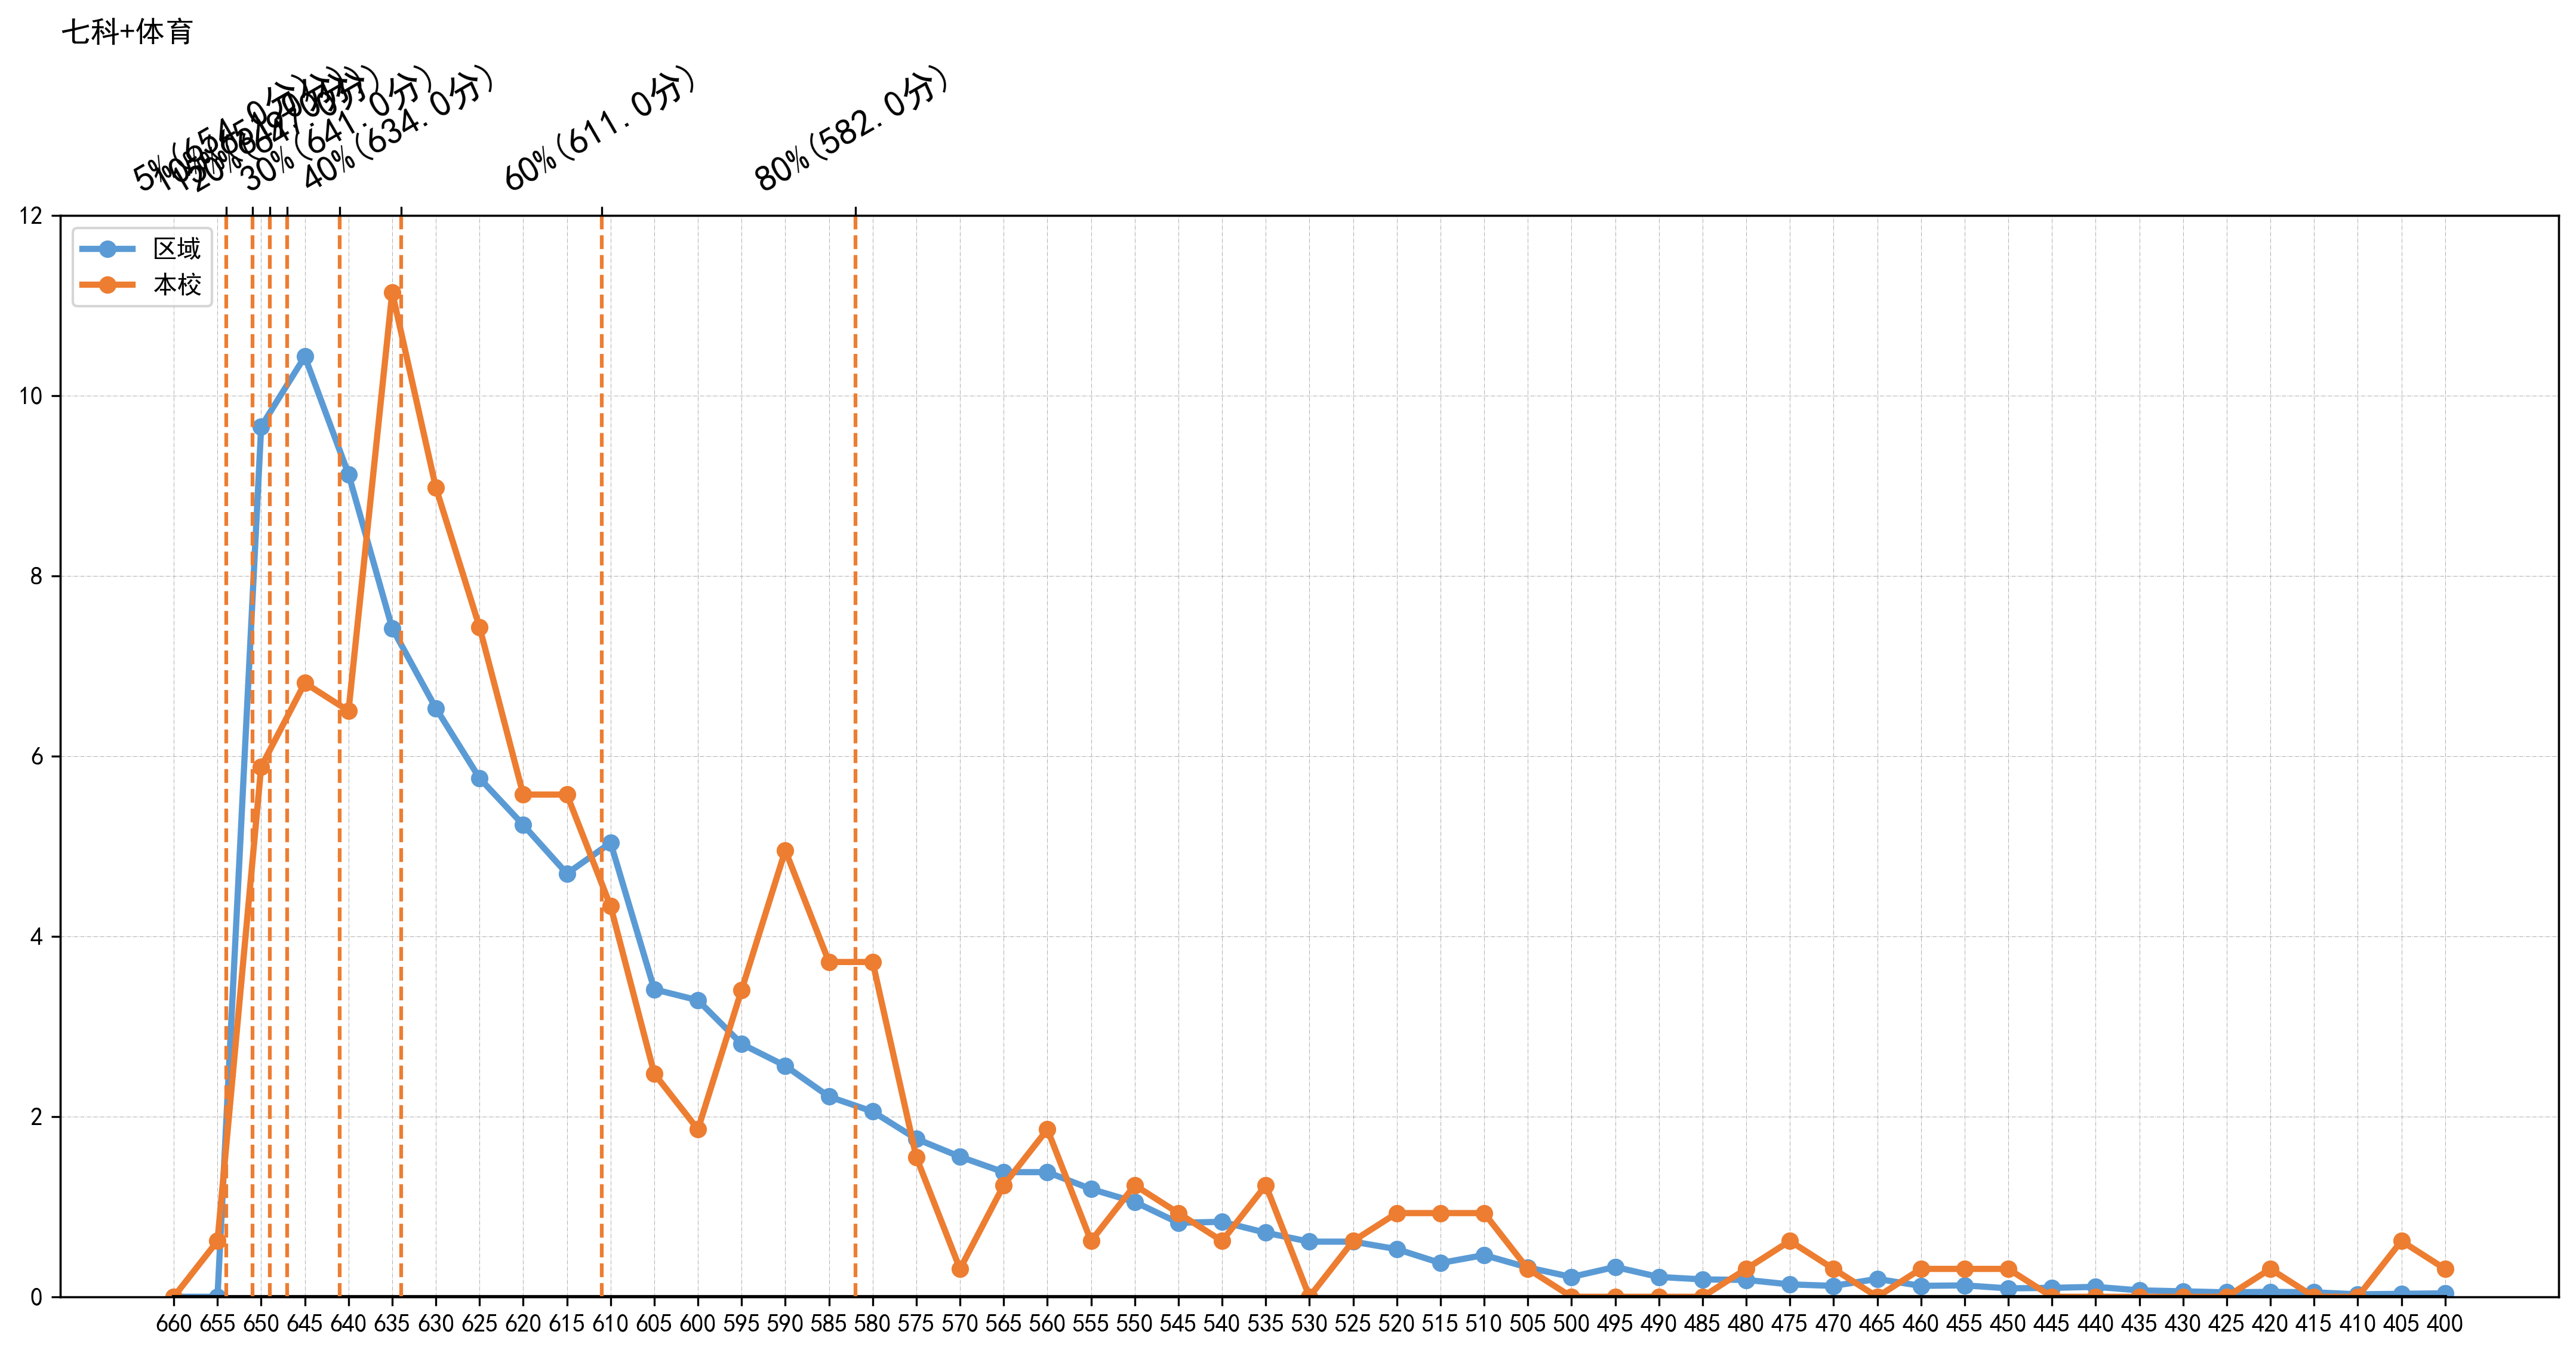

In [14]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig, ax1 = plt.subplots(nrows=1, ncols=1,sharey="row",figsize=(18, 8), dpi=300)   # 画布大小
# 让2个子图的y轴一样，同时创建副坐标轴。
ax2 = ax1.twiny()

# X轴
x1 = x1[:NUM]

color_list =  ['#5B9BD5','#ED7D31','#C9091E']


# Y1
ax1.plot(x1, y1[:NUM], color='#5B9BD5',label="x1",linestyle="-",marker="o",linewidth = 2.5)  # 样式

# Y2
ax1.plot(x1, y3[:NUM], color='#ED7D31',label="x1",linestyle="-",marker="o",linewidth = 2.5)   # 样式

# Y3
# ax1.plot(x1, y4[:NUM], color='#C9091E',label="x1",linestyle="-",marker="o",linewidth = 2.5)   # 样式


# 点描述 和 样式
# for x, y in zip(x1[:-1], y1[:-1]):
#     plt.text(int(x),y,"%.2f" %(y) + '%',verticalalignment='top', horizontalalignment='center',fontsize=12)
# for x, y in zip(x1[:-1], y3[:-1]):
#     plt.text(int(x),y,"%.2f" %(y) + '%',verticalalignment='top', horizontalalignment='center',fontsize=12)


# 竖线
x2 = [ i  for i in range(max_score,-5,-1)][:NUM*5-4]
y2 = [ 0 for i in range(max_score,-5,-1)][:NUM*5-4]
ax2.plot(x2, y2, color='#000')

# 竖线样式
for i in workLineX[:-1]:
    ax2.axvline(i,color='#ED7D31',ls="--",linewidth =1.5)
    
#  合并
plt.gca().invert_xaxis() 

# 图例
ax1.legend(loc='upper left',labels=columns)   # 设置图例在右上角
ax1.grid( ls = '-.', lw = 0.25)  # 生成网格

# 添加标题
plt.title("七科+体育",loc="left")


# 隐藏上X坐标轴
# ax2.get_xaxis().set_visible(False)
# ax2.axis("off")


# 竖线参数 rotation旋转角度 
plt.xticks(ticks = workLineX[:-1],labels=workLineName[:-1] ,rotation=30, fontsize=15)  

# Y轴最大最小值
plt.ylim(ymin=0,ymax = 12)


# 保存图片
plt.savefig(r'F:\8、考试数据分析\理工附中数据\21~22学年\初三21~22中考\整理数据\手工\21~22中考七科+体育区域五分段.jpg', dpi=300, bbox_inches='tight')


plt.show()